# Multiple Linear Regression with Standardized Features: Sklearn

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Load data

In [2]:
url = "https://raw.githubusercontent.com/mk-gurucharan/Regression/master/Startups_Data.csv"
df = pd.read_csv(url)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

## Declare targets and features

In [4]:
# declare features and targets
y = df.iloc[:, -1].values
X_conti = df.iloc[:, :-2].values
X_categ = df.iloc[:, 3].values

## Standardize continuous features


In [5]:
# create scaler and fit to continuous features
scaler = StandardScaler()
scaler.fit(X_conti)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
# standardize continuous features
X_scaled = scaler.transform(X_conti)
X_scaled[:5]

array([[ 2.01641149,  0.56075291,  2.15394309],
       [ 1.95586034,  1.08280658,  1.9236004 ],
       [ 1.75436374, -0.72825703,  1.62652767],
       [ 1.55478369, -0.09636463,  1.42221024],
       [ 1.5049372 , -1.07991935,  1.28152771]])

## Column-Stack categorical and standardized continuous features

In [7]:
# add categorical feature column vector to standardized continuous features
X = np.column_stack((X_scaled, X_categ))
X[:5]

array([[2.016411493158463, 0.560752914530775, 2.153943088571744,
        'New York'],
       [1.9558603364325031, 1.0828065830760816, 1.9236003956421444,
        'California'],
       [1.7543637361407838, -0.728257027688616, 1.6265276693147561,
        'Florida'],
       [1.5547836905426, -0.09636463069766506, 1.4222102362410112,
        'New York'],
       [1.5049372036935103, -1.0799193536742715, 1.2815277086174908,
        'Florida']], dtype=object)

## One-Hot-Encoding of categorical features

In [8]:
# one-hot-encode categorical "State" feature
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [3])], remainder="passthrough")
X = np.array(ct.fit_transform(X))
X[:5]

array([[0.0, 0.0, 1.0, 2.016411493158463, 0.560752914530775,
        2.153943088571744],
       [1.0, 0.0, 0.0, 1.9558603364325031, 1.0828065830760816,
        1.9236003956421444],
       [0.0, 1.0, 0.0, 1.7543637361407838, -0.728257027688616,
        1.6265276693147561],
       [0.0, 0.0, 1.0, 1.5547836905426, -0.09636463069766506,
        1.4222102362410112],
       [0.0, 1.0, 0.0, 1.5049372036935103, -1.0799193536742715,
        1.2815277086174908]], dtype=object)

## Train-Test Split

In [9]:
# 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape[0])
print(X_test.shape[0])
print(X_train.shape[0] / X.shape[0])

40
10
0.8


## Build and train model

In [10]:
# create multiple linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Get model parameters and statistics

In [11]:
# get bias, weights, R-squared, and adjusted R-squared
bias = regressor.intercept_
print("Bias: {:.2f}".format(bias))

weights = regressor.coef_
for i in range(len(weights)):
  print("Weight {}: {:.2f}".format(i, weights[i]))

R2 = regressor.score(X,y)
print("R2: {:.2f}".format(R2))

adj_R2 = 1- (1-R2) * (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)
print("Adj-R2: {:.2f}".format(adj_R2))

Bias: 111688.86
Weight 0: -315.26
Weight 1: 623.53
Weight 2: -308.27
Weight 3: 36608.57
Weight 4: -1907.92
Weight 5: 3614.34
R2: 0.95
Adj-R2: 0.94


## Make predictions and evaluate model

In [12]:
# use model to make prediction from scaled features and compare to actuals
yhat = regressor.predict(X_test)
eval_df = pd.DataFrame({"Actuals": y_test, "Predictions": yhat, "%-Error": np.abs(((yhat-y_test)/y_test)*100)})
eval_df

,Actuals,Predictions,%-Error
0,134307.35,126362.879083,5.915142
1,81005.76,84608.453836,4.447454
2,99937.59,99677.494252,0.260258
3,64926.08,46357.460686,28.599631
4,125370.37,128750.482885,2.696102
5,35673.41,50912.417419,42.718113
6,105733.54,109741.350327,3.790482
7,107404.34,100643.242816,6.294994
8,97427.84,97599.275746,0.175962
9,122776.86,113097.425244,7.883761


In [13]:
# compute mean percentage error
eval_df.loc[:, "%-Error"].mean()

10.278189896425214

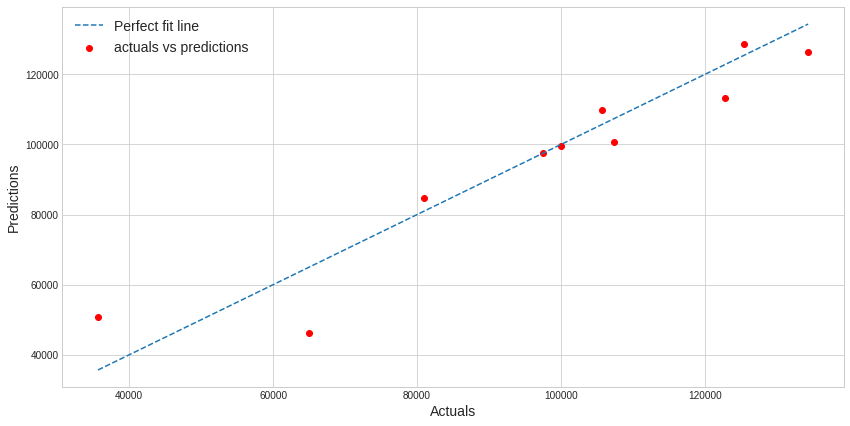

In [14]:
# plot actuals vs predictions
plt.figure(figsize=(14,7))
plt.scatter(y_test, yhat, color="red", label="actuals vs predictions")
plt.plot(np.arange(min(y_test), max(y_test)), np.arange(min(y_test), max(y_test)), linestyle="dashed", label="Perfect fit line")
plt.xlabel("Actuals", fontsize=14)
plt.ylabel("Predictions", fontsize=14)
plt.legend(fontsize=14)
plt.show()